**Ablation study**

Jest to sposób na analize metody działania sieci neuronowych. Została ona zapożyczona z nauk biologicznych w których naukowcy usuwali części narządów organizmów i obserowoali jak brak wpływa na działanie organizmu. W analogiczny sposób naukowcy badają jaki wpływ na działanie sieci neuronowych mają poszczególne jej fragmenty.

Do przeprowadzenia takiego badania posłużę się siecią z [tego](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb) notebooka dotyczącym sieci rozpoznawającej psy i koty.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-04-11 20:12:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  79.1MB/s    in 0.8s    

2021-04-11 20:12:10 (79.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

Mamy architekture sieci.

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Dane zostało odpowiednio zmodyfikowane aby były możliwe do wykorzystywania.

Teraz następuje proces trenowania na normalnej sieci

In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 41s - loss: 0.7533 - acc: 0.5650 - val_loss: 0.6586 - val_acc: 0.6060
Epoch 2/15
100/100 - 8s - loss: 0.6125 - acc: 0.6710 - val_loss: 0.5793 - val_acc: 0.7020
Epoch 3/15
100/100 - 8s - loss: 0.5493 - acc: 0.7220 - val_loss: 0.6859 - val_acc: 0.6110
Epoch 4/15
100/100 - 8s - loss: 0.4863 - acc: 0.7620 - val_loss: 0.5637 - val_acc: 0.7120
Epoch 5/15
100/100 - 8s - loss: 0.4195 - acc: 0.8080 - val_loss: 0.5456 - val_acc: 0.7390
Epoch 6/15
100/100 - 8s - loss: 0.3525 - acc: 0.8500 - val_loss: 0.5952 - val_acc: 0.7120
Epoch 7/15
100/100 - 8s - loss: 0.2612 - acc: 0.8875 - val_loss: 0.6889 - val_acc: 0.7120
Epoch 8/15
100/100 - 8s - loss: 0.1983 - acc: 0.9190 - val_loss: 0.7075 - val_acc: 0.7410
Epoch 9/15
100/100 - 8s - loss: 0.1245 - acc: 0.9550 - val_loss: 1.0341 - val_acc: 0.7130
Epoch 10/15
100/100 - 8s - loss: 0.0996 - acc: 0.9685 - val_loss: 1.0950 - val_acc: 0.7070
Epoch 11/15
100/100 - 8s - loss: 0.0746 - acc: 0.9710 - val_loss: 1.3764 - val_acc: 0.6940
Epoch 1

Text(0.5, 1.0, 'Training and validation loss')

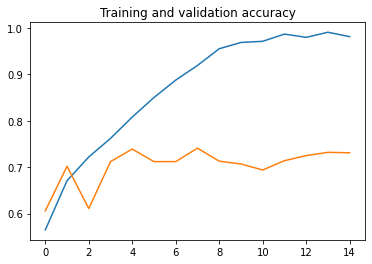

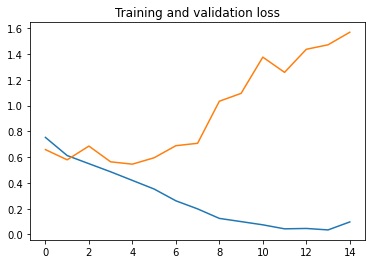

In [9]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Jak widać nasza sieć ma wysoką celoność na zbiorze treningowym ale zauważalnie gorszą na zbiorze walidacyjnym.Oznacza to że nastąpiło zjawisko przeuczenia.

Sprwdźmy teraz co się stanie jak usuniemy część sieci.

Pierwszym kandydatem jest usunięcie "zwykłych" warstw.  

In [10]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 9s - loss: 0.6916 - acc: 0.5535 - val_loss: 0.6339 - val_acc: 0.6390
Epoch 2/15
100/100 - 8s - loss: 0.6179 - acc: 0.6715 - val_loss: 0.5846 - val_acc: 0.6910
Epoch 3/15
100/100 - 8s - loss: 0.5532 - acc: 0.7280 - val_loss: 0.5519 - val_acc: 0.7180
Epoch 4/15
100/100 - 8s - loss: 0.5142 - acc: 0.7425 - val_loss: 0.5664 - val_acc: 0.7080
Epoch 5/15
100/100 - 8s - loss: 0.4748 - acc: 0.7685 - val_loss: 0.5464 - val_acc: 0.7140
Epoch 6/15
100/100 - 8s - loss: 0.4315 - acc: 0.8035 - val_loss: 0.5542 - val_acc: 0.7250
Epoch 7/15
100/100 - 8s - loss: 0.3882 - acc: 0.8240 - val_loss: 0.5652 - val_acc: 0.7320
Epoch 8/15
100/100 - 8s - loss: 0.3516 - acc: 0.8435 - val_loss: 0.5748 - val_acc: 0.7170
Epoch 9/15
100/100 - 8s - loss: 0.3236 - acc: 0.8700 - val_loss: 0.7960 - val_acc: 0.6800
Epoch 10/15
100/100 - 8s - loss: 0.2834 - acc: 0.8785 - val_loss: 0.5825 - val_acc: 0.7200
Epoch 11/15
100/100 - 8s - loss: 0.2500 - acc: 0.8900 - val_loss: 0.6495 - val_acc: 0.7240
Epoch 12/15
100/100

Text(0.5, 1.0, 'Training and validation loss')

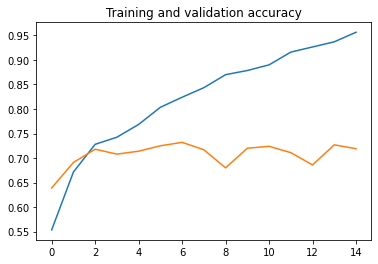

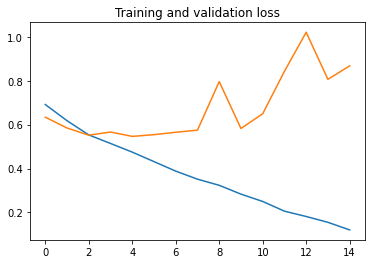

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Jak widać poprzez uproszczenie modelu zmniejszył się czas uczenia (10%) ale starciła na tym celnośc na zbiorze treningowym. Celnośc na zbiorze walidacyjnym natomiast pozostała na podobnym poziomie.

Spróbujmy teraz dodać dodatkową warstwe konwolucyjną.

In [15]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 - 9s - loss: 0.7431 - acc: 0.5180 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/15
100/100 - 8s - loss: 0.6926 - acc: 0.5545 - val_loss: 0.6574 - val_acc: 0.6070
Epoch 3/15
100/100 - 8s - loss: 0.6413 - acc: 0.6370 - val_loss: 0.5908 - val_acc: 0.6840
Epoch 4/15
100/100 - 8s - loss: 0.5815 - acc: 0.7015 - val_loss: 0.5534 - val_acc: 0.7100
Epoch 5/15
100/100 - 8s - loss: 0.5218 - acc: 0.7325 - val_loss: 0.5547 - val_acc: 0.7220
Epoch 6/15
100/100 - 8s - loss: 0.4622 - acc: 0.7845 - val_loss: 0.6095 - val_acc: 0.7300
Epoch 7/15
100/100 - 8s - loss: 0.4151 - acc: 0.8115 - val_loss: 0.5416 - val_acc: 0.7180
Epoch 8/15
100/100 - 8s - loss: 0.3543 - acc: 0.8455 - val_loss: 0.6478 - val_acc: 0.7090
Epoch 9/15
100/100 - 8s - loss: 0.2964 - acc: 0.8760 - val_loss: 0.6834 - val_acc: 0.7440
Epoch 10/15
100/100 - 8s - loss: 0.2610 - acc: 0.8920 - val_loss: 0.6483 - val_acc: 0.7410
Epoch 11/15
100/100 - 8s - loss: 0.1914 - acc: 0.9180 - val_loss: 1.0882 - val_acc: 0.6800
Epoch 12/15
100/100

Text(0.5, 1.0, 'Training and validation loss')

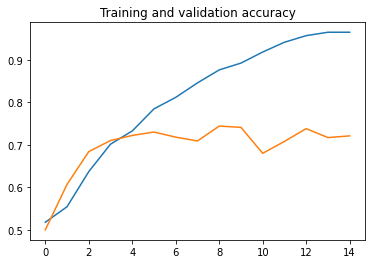

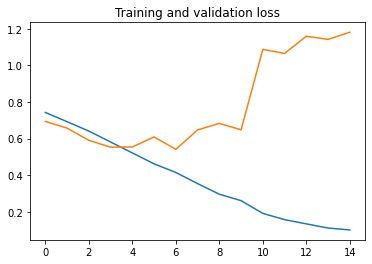

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Nie zmieniło to dużo w spodobie działania sieci.

Spróbujmy teraz odjąć sieć konwolucyjną:


In [20]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 9s - loss: 1.1409 - acc: 0.5815 - val_loss: 0.6214 - val_acc: 0.6670
Epoch 2/15
100/100 - 8s - loss: 0.5789 - acc: 0.7150 - val_loss: 0.6388 - val_acc: 0.6210
Epoch 3/15
100/100 - 8s - loss: 0.4383 - acc: 0.7970 - val_loss: 0.6752 - val_acc: 0.6750
Epoch 4/15
100/100 - 8s - loss: 0.3066 - acc: 0.8700 - val_loss: 0.7452 - val_acc: 0.6750
Epoch 5/15
100/100 - 8s - loss: 0.2099 - acc: 0.9225 - val_loss: 0.6972 - val_acc: 0.6940
Epoch 6/15
100/100 - 8s - loss: 0.1210 - acc: 0.9560 - val_loss: 0.9590 - val_acc: 0.6950
Epoch 7/15
100/100 - 8s - loss: 0.0656 - acc: 0.9815 - val_loss: 1.0991 - val_acc: 0.6840
Epoch 8/15
100/100 - 8s - loss: 0.0462 - acc: 0.9835 - val_loss: 1.2454 - val_acc: 0.6900
Epoch 9/15
100/100 - 8s - loss: 0.0667 - acc: 0.9855 - val_loss: 1.3318 - val_acc: 0.6800
Epoch 10/15
100/100 - 8s - loss: 0.0150 - acc: 0.9960 - val_loss: 1.6365 - val_acc: 0.6920
Epoch 11/15
100/100 - 8s - loss: 0.0715 - acc: 0.9890 - val_loss: 1.5884 - val_acc: 0.6910
Epoch 12

Text(0.5, 1.0, 'Training and validation loss')

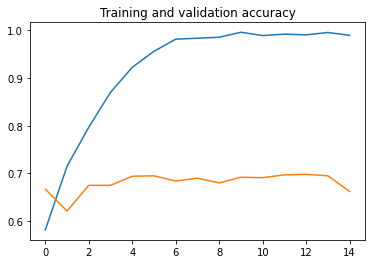

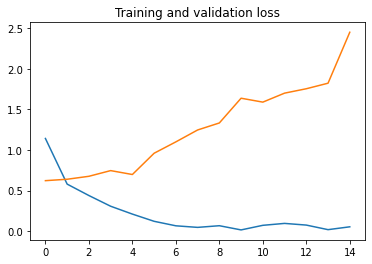

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

To również nic nie daje. 
Spróbujmy zatem zmienić funkcje aktywacji z ReLu na tanh.

In [24]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='tanh')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='tanh')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='tanh')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='tanh')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 9s - loss: 3.3225 - acc: 0.4965 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 2/15
100/100 - 8s - loss: 0.7117 - acc: 0.5120 - val_loss: 0.6998 - val_acc: 0.5000
Epoch 3/15
100/100 - 8s - loss: 0.7225 - acc: 0.4980 - val_loss: 0.7060 - val_acc: 0.5000
Epoch 4/15
100/100 - 8s - loss: 0.7157 - acc: 0.5105 - val_loss: 0.7053 - val_acc: 0.5080
Epoch 5/15
100/100 - 8s - loss: 0.7131 - acc: 0.5160 - val_loss: 0.7326 - val_acc: 0.5000
Epoch 6/15
100/100 - 8s - loss: 0.7115 - acc: 0.5180 - val_loss: 0.6860 - val_acc: 0.5350
Epoch 7/15
100/100 - 8s - loss: 0.7151 - acc: 0.5475 - val_loss: 0.6934 - val_acc: 0.5060
Epoch 8/15
100/100 - 8s - loss: 0.7153 - acc: 0.4920 - val_loss: 0.6863 - val_acc: 0.5250
Epoch 9/15
100/100 - 8s - loss: 0.7062 - acc: 0.5250 - val_loss: 0.6928 - val_acc: 0.5080
Epoch 10/15
100/100 - 8s - loss: 0.7139 - acc: 0.5175 - val_loss: 0.7038 - val_acc: 0.5020
Epoch 11/15
100/100 - 8s - loss: 0.7135 - acc: 0.4985 - val_loss: 0.7041 - val_acc: 0.5000
Epoch 12

Text(0.5, 1.0, 'Training and validation loss')

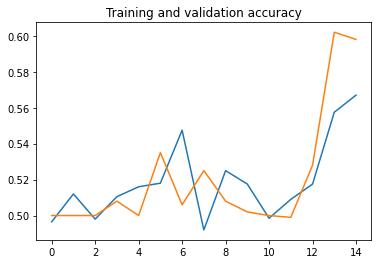

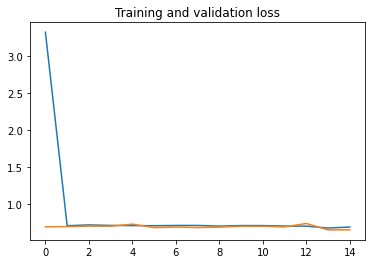

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


Jak widać sieć nie może się nawet nauczyć tak aby mieć dobry wynik na zbiorze testowym.

Podsumowując jak widać część z elementów sieci (Ilość warstw konwolucyjnych, Ilość połączeń warstw gęstych) nie ma znaczącego wpływu na tak prostą sieć jednakże bardzo duży wpływ ma funkcja aktywacji